# AWS EC2 Pricing Model for `ap-southeast-1`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [4]:
df = pd.read_csv('ec2.csv')
df['memory'] = df['memory'].str.replace(' GiB', '').astype(float)
df['monthly_rate'] = df['rate'] * 24 * 30
df.head()

,name,rate,vcpu,memory,storage,network,monthly_rate
0,t4g.nano,0.0053,2,0.5,EBS Only,Up to 5 Gigabit,3.816
1,t4g.micro,0.0106,2,1.0,EBS Only,Up to 5 Gigabit,7.632
2,t4g.small,0.0212,2,2.0,EBS Only,Up to 5 Gigabit,15.264
3,t4g.medium,0.0424,2,4.0,EBS Only,Up to 5 Gigabit,30.528
4,t4g.large,0.0848,2,8.0,EBS Only,Up to 5 Gigabit,61.056


In [5]:
df['price_per_cpu'] = df['rate'] / df['vcpu']
df['memory_per_cpu'] = df['memory'] / df['vcpu']
df.head()

,name,rate,vcpu,memory,storage,network,monthly_rate,price_per_cpu,memory_per_cpu
0,t4g.nano,0.0053,2,0.5,EBS Only,Up to 5 Gigabit,3.816,0.00265,0.25
1,t4g.micro,0.0106,2,1.0,EBS Only,Up to 5 Gigabit,7.632,0.00530,0.50
2,t4g.small,0.0212,2,2.0,EBS Only,Up to 5 Gigabit,15.264,0.01060,1.00
3,t4g.medium,0.0424,2,4.0,EBS Only,Up to 5 Gigabit,30.528,0.02120,2.00
4,t4g.large,0.0848,2,8.0,EBS Only,Up to 5 Gigabit,61.056,0.04240,4.00


In [7]:
def recommend_instance(vcpu_required, memory_required, max_price_per_hour):
    # Filter based on vCPU, Memory, and Price
    filtered_df = df[
        (df['vcpu'] >= vcpu_required) &
        (df['memory'] >= memory_required) &
        (df['rate'] <= max_price_per_hour)
    ]
    
    # If any instances match the criteria, return the best one (cheapest in this case)
    if not filtered_df.empty:
        return filtered_df.sort_values('rate').head(10)
    else:
        return "No instances match the criteria."

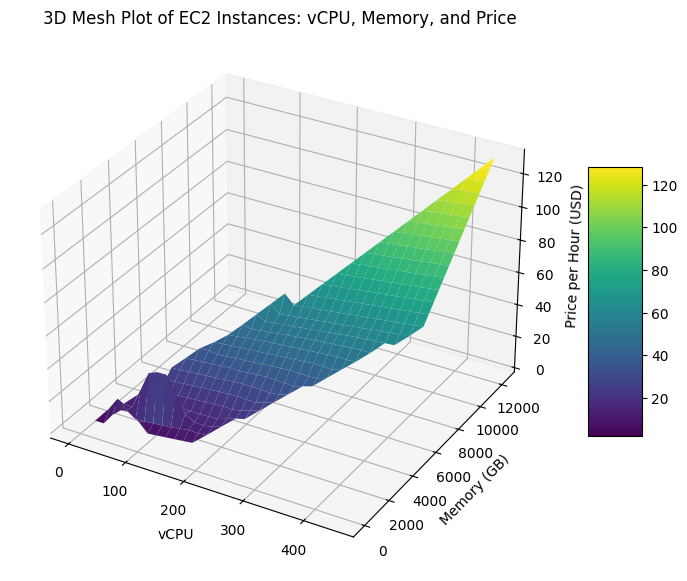

In [8]:
x = df['vcpu']
y = df['memory']
z = df['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

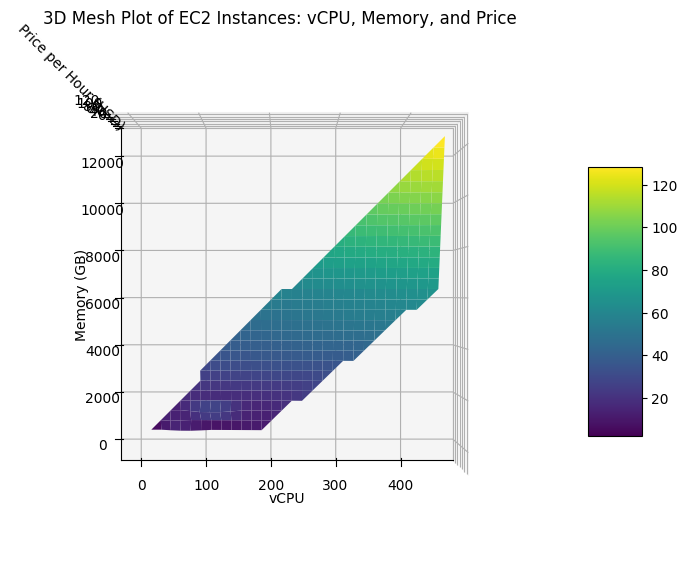

In [9]:
x = df['vcpu']
y = df['memory']
z = df['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
# Add labels and title
ax.view_init(elev=90, azim=-90)
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [10]:
df_plot = df[
        (df['vcpu'] <= 8) &
        (df['memory'] <= 100)]
df_plot

,name,rate,vcpu,memory,storage,network,monthly_rate,price_per_cpu,memory_per_cpu
0,t4g.nano,0.00530,2,0.5,EBS Only,Up to 5 Gigabit,3.8160,0.002650,0.25
1,t4g.micro,0.01060,2,1.0,EBS Only,Up to 5 Gigabit,7.6320,0.005300,0.50
2,t4g.small,0.02120,2,2.0,EBS Only,Up to 5 Gigabit,15.2640,0.010600,1.00
3,t4g.medium,0.04240,2,4.0,EBS Only,Up to 5 Gigabit,30.5280,0.021200,2.00
4,t4g.large,0.08480,2,8.0,EBS Only,Up to 5 Gigabit,61.0560,0.042400,4.00
...,...,...,...,...,...,...,...,...,...
612,im4gn.xlarge,0.43608,4,16.0,1 x 1875 SSD,Up to 25 Gigabit,313.9776,0.109020,4.00
613,im4gn.2xlarge,0.87217,8,32.0,1 x 3750 SSD,Up to 25 Gigabit,627.9624,0.109021,4.00
618,inf2.xlarge,1.06148,4,16.0,EBS Only,Up to 15 Gigabit,764.2656,0.265370,4.00
622,inf1.xlarge,0.30800,4,8.0,EBS Only,Up to 25 Gigabit,221.7600,0.077000,2.00


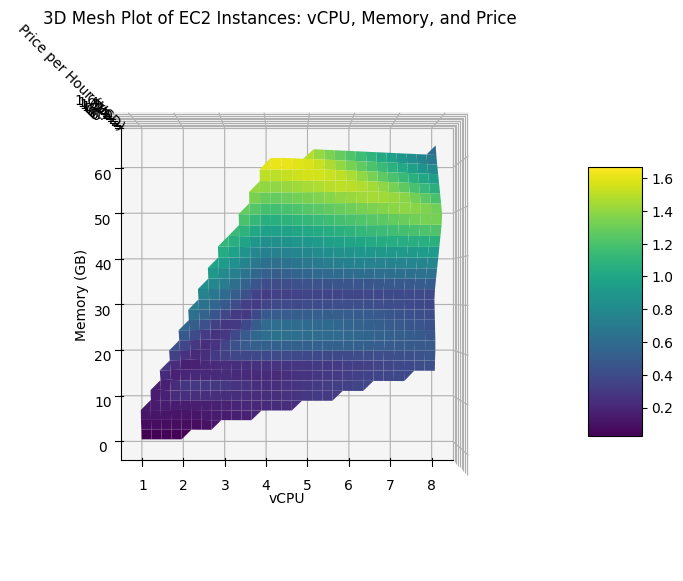

In [12]:
x = df_plot['vcpu']
y = df_plot['memory']
z = df_plot['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
ax.view_init(elev=90, azim=-90)
# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

# Recommendation for `control-plane` & `cluster-config`

Specification:

| **vCPU (`cores`)** | **Memory ( `GiB` )** |
|:------------------:|:--------------------:|
|          2         |           2          |

In [64]:
dfcp = df[
        (df['vcpu'] > 0) &
        (df['memory'] < 32) &
        (df['monthly_rate'] <= 150)
    ]

In [65]:
dfcp

,name,rate,vcpu,memory,storage,network,monthly_rate
0,t4g.nano,0.00530,2,0.50,EBS Only,Up to 5 Gigabit,3.8160
1,t4g.micro,0.01060,2,1.00,EBS Only,Up to 5 Gigabit,7.6320
2,t4g.small,0.02120,2,2.00,EBS Only,Up to 5 Gigabit,15.2640
3,t4g.medium,0.04240,2,4.00,EBS Only,Up to 5 Gigabit,30.5280
4,t4g.large,0.08480,2,8.00,EBS Only,Up to 5 Gigabit,61.0560
...,...,...,...,...,...,...,...
546,r4.large,0.16000,2,15.25,EBS Only,Up to 10 Gigabit,115.2000
559,i4g.large,0.18513,2,16.00,1 x 468 SSD,NaN,133.2936
565,i4i.large,0.20600,2,16.00,1 x 468 NVMe SSD,Up to 10 Gigabit,148.3200
575,i3.large,0.18700,2,15.25,1 x 475 NVMe SSD,Up to 10 Gigabit,134.6400


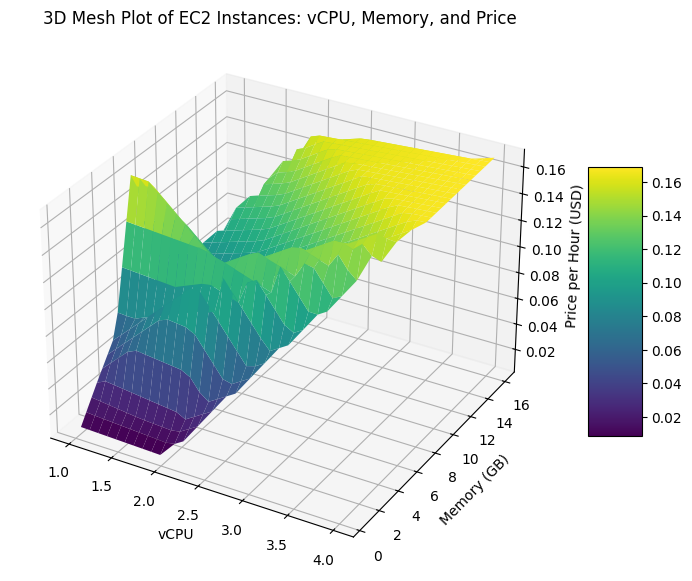

In [67]:
x = dfcp['vcpu']
y = dfcp['memory']
z = dfcp['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
#ax.view_init(elev=90, azim=-90)
# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

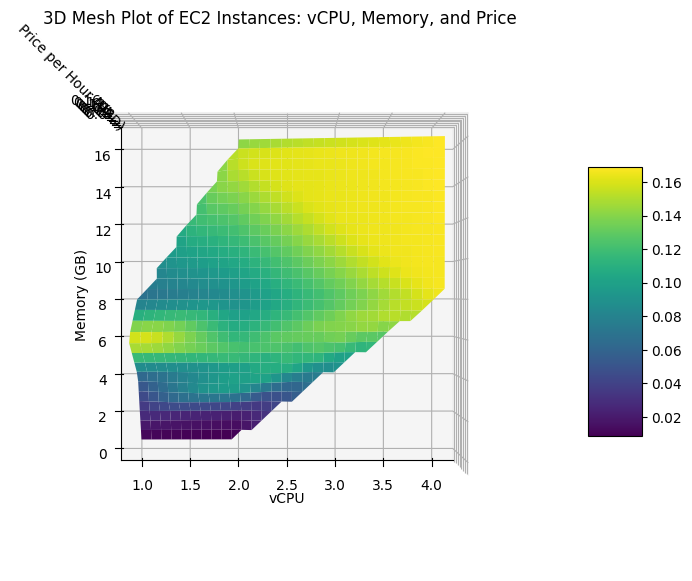

In [68]:
x = dfcp['vcpu']
y = dfcp['memory']
z = dfcp['rate']

# Create a mesh grid for interpolation
x_mesh, y_mesh = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))

# Interpolate the Z values (prices) over the mesh grid
z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot a surface using the mesh grid
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none')
ax.view_init(elev=90, azim=-90)
# Add labels and title
ax.set_xlabel('vCPU')
ax.set_ylabel('Memory (GB)')
ax.set_zlabel('Price per Hour (USD)')
ax.set_title('3D Mesh Plot of EC2 Instances: vCPU, Memory, and Price')

# Add a color bar for the surface
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()

In [69]:
candidates_cp = recommend_instance(2, 2, 125)
print("\nRecommended EC2 instance based on criteria:")
candidates_cp


Recommended EC2 instance based on criteria:


,name,rate,vcpu,memory,storage,network,monthly_rate
2,t4g.small,0.0212,2,2.0,EBS Only,Up to 5 Gigabit,15.264
16,t3a.small,0.0236,2,2.0,EBS Only,Up to 5 Gigabit,16.992
9,t3.small,0.0264,2,2.0,EBS Only,Up to 5 Gigabit,19.008
3,t4g.medium,0.0424,2,4.0,EBS Only,Up to 5 Gigabit,30.528
17,t3a.medium,0.0472,2,4.0,EBS Only,Up to 5 Gigabit,33.984
10,t3.medium,0.0528,2,4.0,EBS Only,Up to 5 Gigabit,38.016
24,t2.medium,0.0584,2,4.0,EBS Only,Low to Moderate,42.048
242,c6g.large,0.0784,2,4.0,EBS Only,Up to 10 Gigabit,56.448
197,c7g.large,0.0833,2,4.0,EBS Only,Up to 12500 Megabit,59.976
4,t4g.large,0.0848,2,8.0,EBS Only,Up to 5 Gigabit,61.056


# Recommendation for `control-default`

Specification:

| **vCPU (`cores`)** | **Memory ( `GiB` )** |
|:------------------:|:--------------------:|
|          4         |           16          |

In [156]:
df[(df['vcpu'] >= 2) & (df['memory'] >=4)].sort_values('monthly_rate').head(10)

,name,rate,vcpu,memory,storage,network,monthly_rate
3,t4g.medium,0.0424,2,4.0,EBS Only,Up to 5 Gigabit,30.528
17,t3a.medium,0.0472,2,4.0,EBS Only,Up to 5 Gigabit,33.984
10,t3.medium,0.0528,2,4.0,EBS Only,Up to 5 Gigabit,38.016
24,t2.medium,0.0584,2,4.0,EBS Only,Low to Moderate,42.048
242,c6g.large,0.0784,2,4.0,EBS Only,Up to 10 Gigabit,56.448
197,c7g.large,0.0833,2,4.0,EBS Only,Up to 12500 Megabit,59.976
4,t4g.large,0.0848,2,8.0,EBS Only,Up to 5 Gigabit,61.056
306,c5a.large,0.0880,2,4.0,EBS Only,Up to 10 Gigabit,63.360
230,c6a.large,0.0882,2,4.0,EBS Only,Up to 12500 Megabit,63.504
251,c6gd.large,0.0900,2,4.0,1 x 118 NVMe SSD,Up to 10 Gigabit,64.800
